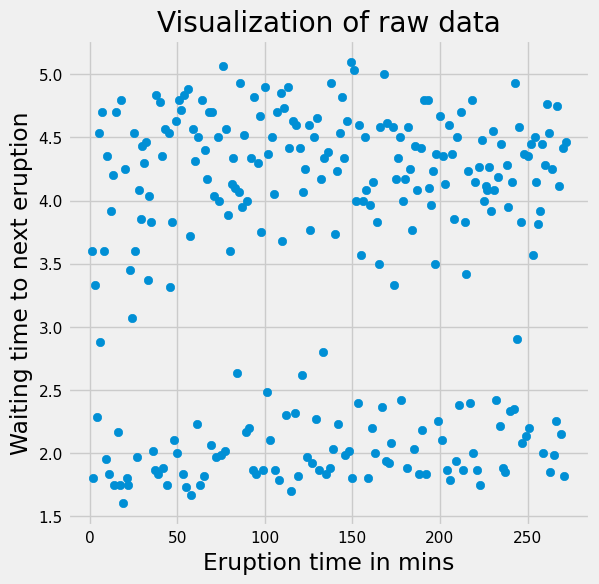

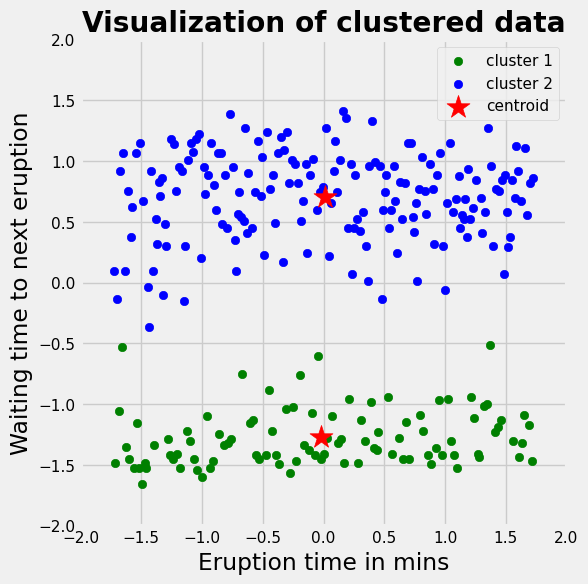

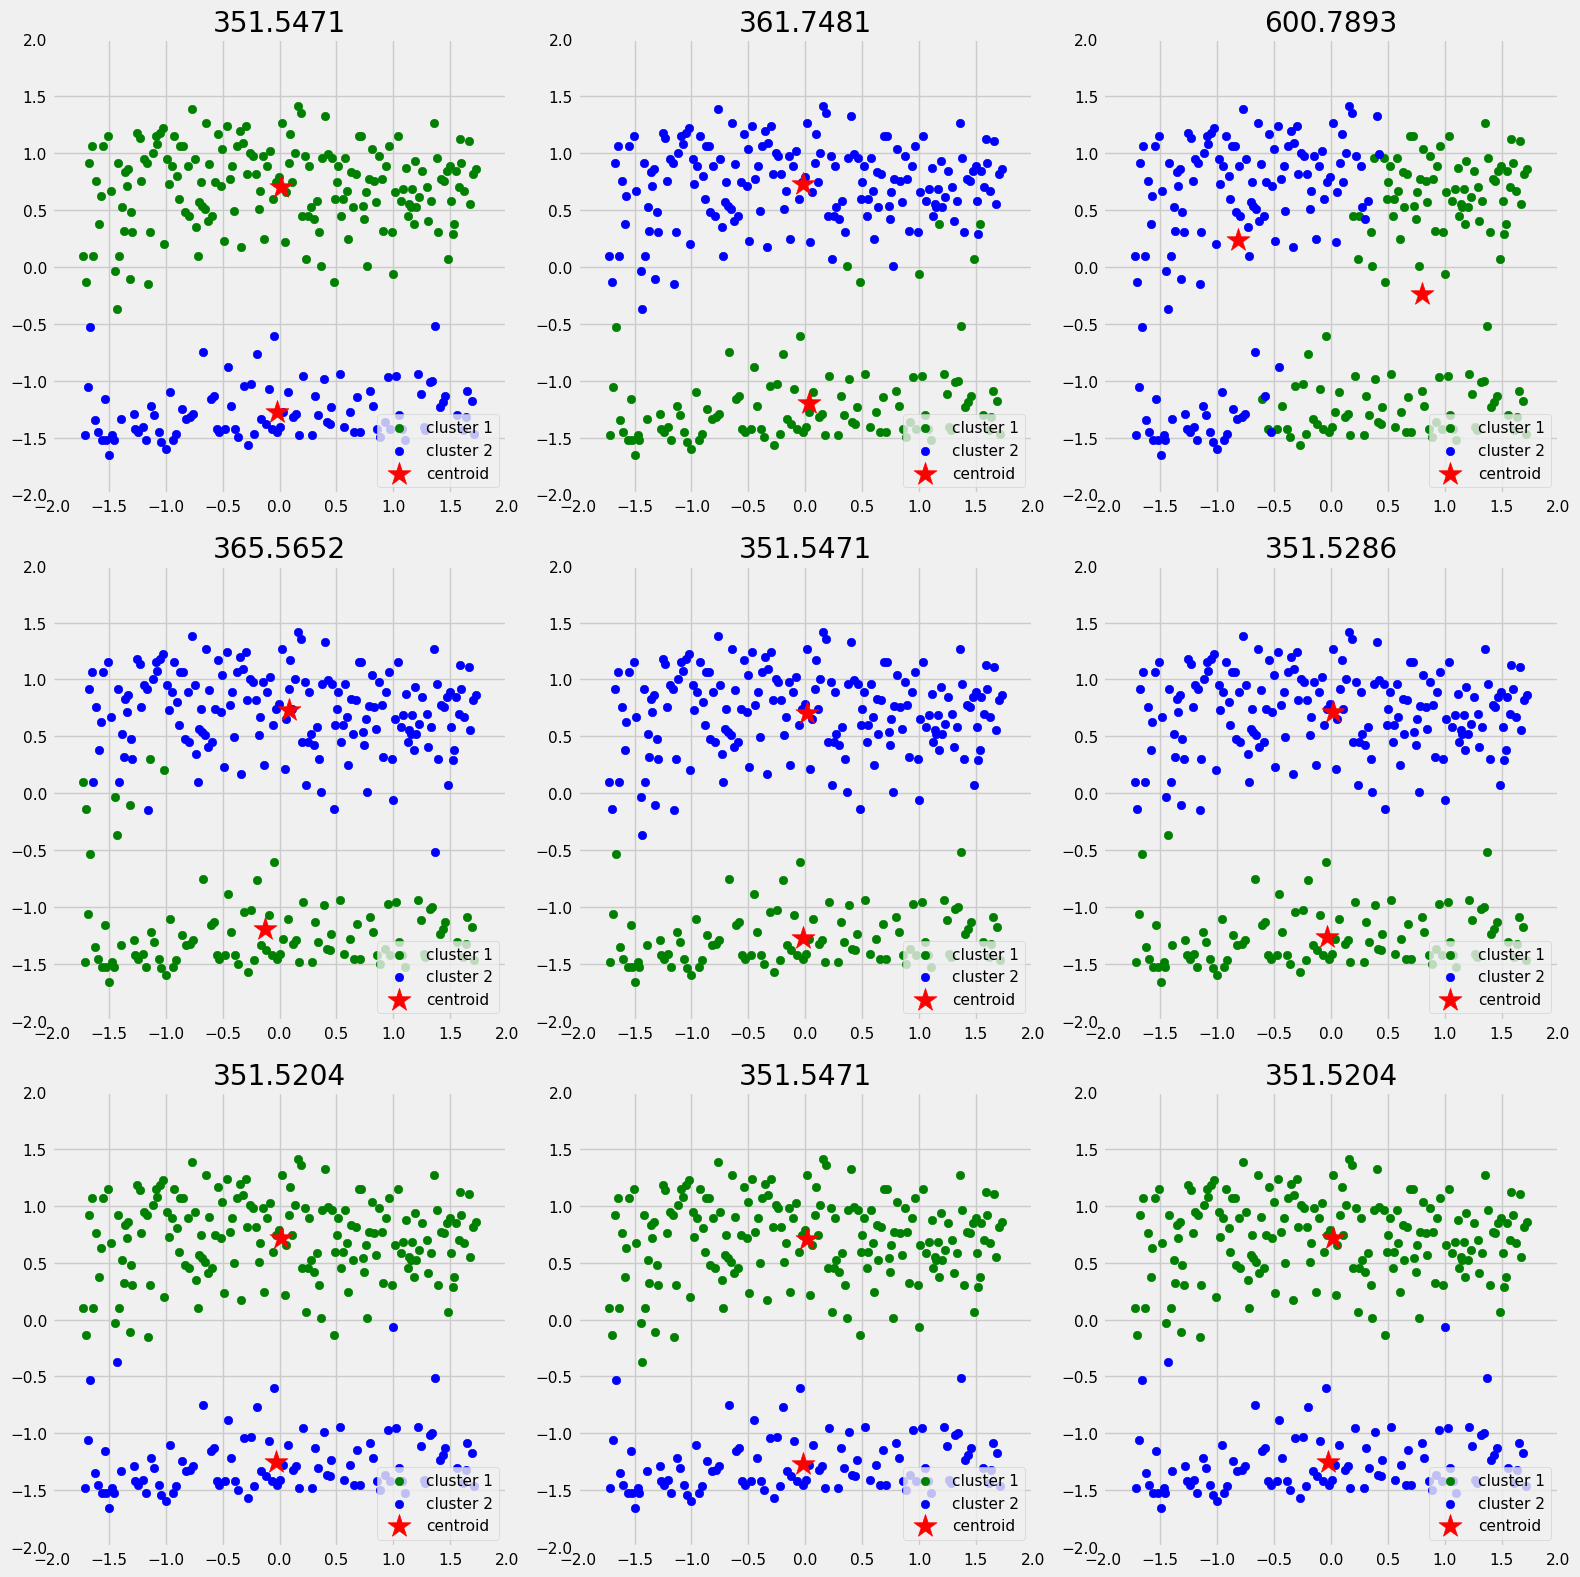

In [4]:

import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    # my note: here initializ_centroids takes in the dataframe, df
    def initializ_centroids(self, X):
        
       # my note: here random_state = 123
       # here numpy get randomize with random_state
        np.random.RandomState(self.random_state)
        
        # the data y value is randomized
        random_idx = np.random.permutation(X.shape[0])
        
        #print('THIS IS THE RANDOM idx from initialize', random_idx)
        
        # centroids get the 3 columns and 2 rows of the x values
        # the two rows corresponds to n_clusters
        # the 3 columns because there are 3 columns in the dataset?
        # this read as : get random_idx  3 columns and 2 rows
        # the deviation data shows the deviation data in 3 columns of x elements
        
        # [:self.n_cluster] is the same as starting from 0  [0; self.n_clusters]
        centroids = X[random_idx[:self.n_clusters]] # this set the centroid 2 rows at a time [[ 0.21013994 -0.95480609 -0.43456715]
        # all the rows but set it 2 rows of 3                                              # [ 0.03183938 -1.27694185 -1.31887336]]
    
        
        # return centroid with 2 set of rows with 3 deviation for each set
        return centroids

    def compute_centroids(self, X, labels):
        
        # zero out centroids with 2 rows, 3 columns
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        #distance is zeroes [0, 0]
        distance = np.zeros((X.shape[0], self.n_clusters))
        # what is norm (linalg.norm(x, ord=None, axis=None, keepdims=False)[source]) from numpy.linalg

        for k in range(self.n_clusters):
            
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        
        #run argmin from np to get the smallest distance
        return np.argmin(distance, axis=1)
    
    
    #  compute the silhouette score
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        
        # set the value for centroids by calling initializ_centroid instance with deviation value of x elements
        # self.centroids get the return value centroids
        self.centroids = self.initializ_centroids(X)
        
        # max_iter = 3
        for i in range(self.max_iter):
            old_centroids = self.centroids
            
            distance = self.compute_distance(X, old_centroids)
            
            # this find the mininum distance [[4.59307370e+00 8.66758553e-01]
            self.labels = self.find_closest_cluster(distance)
            
            #Compute centroid with minimun distance of the 2 clusters
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    # predict does seem to be called by any: commented, code work the same
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

#------end of class Kmeans

import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('eruption_dataset.csv')


# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

# Standardize the data

'''
the standard deviation scaler Z = x- (mean/standard deviation)

this means, any x number below  the mean/standard deviation will be negative

'''
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans


# km here is object of the class kmeans (my note)
#initializes km object with cluster number 2
km = Kmeans(n_clusters=2, max_iter=100)


#my note: send df as X_std to fit instance, the standard deviation of the dataset
km.fit(X_std)

# after fit instance return centroids with 2 sets of standard deviation with 3 column each
# now this centroids is initialized with it and then it is plotted 
centroids = km.centroids

# Plot 
fig, ax = plt.subplots(figsize=(6, 6))

# here, km label for x get get the first column name and y get the second column name
# km.label is like x.label with its indexes
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')

# this the centroid data graph
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

# after plotting set the iteration to 9 so will do a subplot 9 times.
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)

centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    # set object with cluster size, max_iteration and random_state number
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    
    # and then fit it with standard deviation
    km.fit(X_std)
    centroids = km.centroids
    # with each iteration centroids (2 rows with 3 columns of element from standard deviation is added to center
    # and then plotted
    centers.append(centroids)
   
    ax[i].scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();
